# CSC 580 Artificial Intelligence II, Winter 2025
# HW\#2 Cliffwalk -- Start-up code


### 1. Install gymnasium and create a Cliff Walk environment

In [1]:
# Install gymnasium (in particular the toy-text subset)
!pip install gymnasium[toy-text]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 10.4 MB/s eta 0:00:00


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
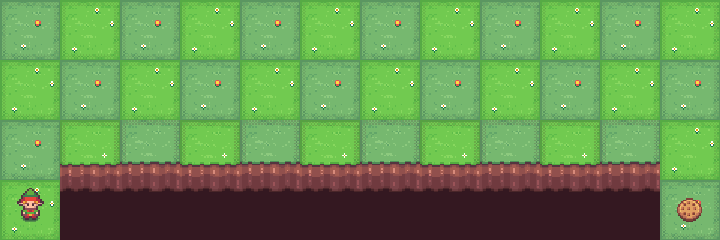

In [2]:
import gymnasium as gym
import numpy as np

# Create a Cliff Walk environment using Gymnasium
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")#'ansi')#

# Reset the environment and display it
env.reset()

#print (env.render())  # textual output if mode == 'ansi' or 'human'
env.render() # gui/rgb output

### 2. Inspect environment, transition probabilities and rewards

In [3]:
nS = env.observation_space.n    # number of states -- 48
nA = env.action_space.n         # number of actions -- four directions; 0:left, 1:down, 2:right, 3:up
print ("{}, {}".format(nS, nA))

48, 4


Transition probabilities, rewards and other info are stored a dictionary **env.P**.  You use state index (0-based) to access the info.  The tuple for each transition indicates (transition_probability, new_state, reward, terminated).

**IMPORTANT**: If you get an error "AttributeError: 'OrderEnforcing' object has no attribute 'P'", add a line to unwrap the environment and access P inside.  For example,

<pre># Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]</pre>

In [4]:
# Probatilies from State 0 (top-left corner).
#env.P[0]

# Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]

{0: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False)],
 1: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False)],
 2: [(0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False)],
 3: [(0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False)]}

In [5]:
# Probatilies from the start state (36)
env_unwrapped.P[36]

{0: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False)],
 1: [(0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False)],
 2: [(0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False)],
 3: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False)]}

In [6]:
# Transition probability for trying to go left (action 3) from the start state (36)
env_unwrapped.P[36][3]

[(0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 24, -1, False)]

## 3. Create a random/fixed policy and run the policy once.


In [7]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    number between 0 (inclusive) and # of actions (exclusive) randomly chosen.
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

In [8]:
def run(env, pi, printinfo = False):
    """
    Run the policy on the environment and returns the cumulative reward.
    :param: env: The environment
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :return: Cumulative reward
    """
    s = env.reset()
    if printinfo == True:
      print (f'\n* Episode starting from state {s[0]}') # ensure starting from state 36

    s = s[0]      # extract the state value/index from the tuple
    done = False  # this becomes true when agent reaches the goal state (47)
    sum_r = 0
    while not done:
        a = pi[s]   # action for the state s, according to the policy
        s, r, done, info, p = env.step(a)  # take the action
        sum_r += r  # accumulate reward

        ### uncomment below to see the information for each step
        #print (f'next_state={s}, reward={r}, done={done}, info={info}, p={p}')

        # prints info in text if render_mode is 'ansi' or no output if 'human',
        # or graphical output if 'rgb_array' AND if the code is run from command line.
        env.render()
    return sum_r

### Run the given policy just once and observe what's returned (the total return).

In [9]:
policy = generate_random_policy(nA, nS, 17) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
# Print the total rewards/return
print (f' ==> Total return: {result}')

*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
 ==> Total return: -4153
